# Question 1
## Part 1

In [1]:
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from nltk import wordpunct_tokenize
from nltk.corpus import stopwords
%matplotlib inline

In [2]:
d = path.dirname('hillary-clinton-emails/')

# Read the whole text of the emails.
text = open(path.join(d, 'Emails.csv')).read()

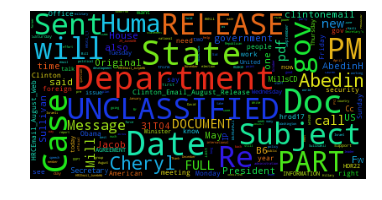

In [3]:
# Generate and display wordcloud with a lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Now if we take not the full data in *Emails.csv*, but only the *ExtractedBodyText*.

In [4]:
fullDF = pd.read_csv('hillary-clinton-emails/Emails.csv')
DFbody = fullDF.ExtractedBodyText.dropna()
print(DFbody.head(10))

1     B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...
2                                                   Thx
4     H <hrod17@clintonemail.com>\nFriday, March 11,...
5     Pis print.\n-•-...-^\nH < hrod17@clintonernail...
7     H <hrod17@clintonemail.corn>\nFriday, March 11...
8                                                   FYI
9     B6\nWednesday, September 12, 2012 6:16 PM\nFwd...
10                                         Fyi\nB6\n— —
11    B6\nWednesday, September 12, 2012 6:16 PM\nFwd...
12                                                  Fyi
Name: ExtractedBodyText, dtype: object


In [5]:
fullDF['ExtractedBodyText'].to_csv('hillary-clinton-emails/BodyEmails.csv')

In [6]:
bodyCSV = open(path.join(d, 'BodyEmails.csv')).read()
bodyCSV[0:1000]

'0,\n1,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest How Syria is aiding Qaddafi and more... Sid\nhrc memo syria aiding libya 030311.docx; hrc memo syria aiding libya 030311.docx\nMarch 3, 2011\nFor: Hillary"\n2,Thx\n3,\n4,"H <hrod17@clintonemail.com>\nFriday, March 11, 2011 1:36 PM\nHuma Abedin\nFw: H: Latest: How Syria is aiding Qaddafi and more... Sid\nhrc memo syria aiding libya 030311.docx\nPis print."\n5,"Pis print.\n-•-...-^\nH < hrod17@clintonernailcom>\nWednesday, September 12, 2012 2:11 PM\n°Russorv@state.gov\'\nFw: Meet The Right-Wing Extremist Behind Anti-fvluslim Film That Sparked Deadly Riots\nFrom [meat)\nSent: Wednesday, September 12, 2012 01:00 PM\nTo: 11\nSubject: Meet The Right Wing Extremist Behind Anti-Muslim Film That Sparked Deadly Riots\nhtte/maxbiumenthal.com12012/09/meet-the-right-wing-extremist-behind-anti-musiim-tihn-that-sparked-\ndeadly-riots/\nSent from my Verizon Wireless 4G LTE DROID\nU.S. Department of State\nCase No. F-2015-04841\nDoc No. C05739559\

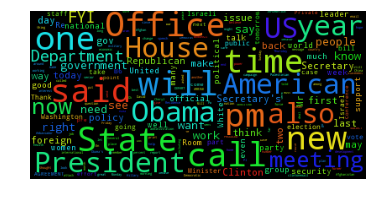

In [7]:
# Display wordcloud with a lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(bodyCSV)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Part 2
### Tokenization

In [9]:
#tokens = nltk.word_tokenize(bodyCSV)
tokens = wordpunct_tokenize(bodyCSV) # Better to consider punctuation

In [10]:
print(tokens[0:30])
print(len(tokens))

['0', ',', '1', ',"', 'B6', 'Thursday', ',', 'March', '3', ',', '2011', '9', ':', '45', 'PM', 'H', ':', 'Latest', 'How', 'Syria', 'is', 'aiding', 'Qaddafi', 'and', 'more', '...', 'Sid', 'hrc', 'memo', 'syria']
762245


### Stop words

In [11]:
filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]

In [12]:
print(filtered_tokens[0:30])
print(len(filtered_tokens))

['0', ',', '1', ',"', 'B6', 'Thursday', ',', 'March', '3', ',', '2011', '9', ':', '45', 'PM', 'H', ':', 'Latest', 'How', 'Syria', 'aiding', 'Qaddafi', '...', 'Sid', 'hrc', 'memo', 'syria', 'aiding', 'libya', '030311']
530167


In [13]:
filteredBody = ' '.join(filtered_tokens)

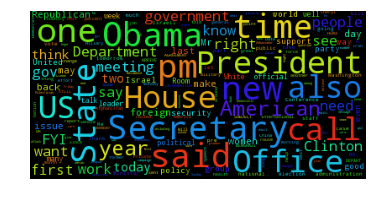

In [14]:
# Display wordcloud with a lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(filteredBody)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Stemming
* First way: LancasterStemmer

In [15]:
from nltk.stem.lancaster import LancasterStemmer

In [16]:
st = LancasterStemmer()
stemmed_tokens = [st.stem(word) for word in filtered_tokens]

In [17]:
print(stemmed_tokens[0:30])
print(len(stemmed_tokens))

['0', ',', '1', ',"', 'b6', 'thursday', ',', 'march', '3', ',', '2011', '9', ':', '45', 'pm', 'h', ':', 'latest', 'how', 'syr', 'aid', 'qaddaf', '...', 'sid', 'hrc', 'memo', 'syr', 'aid', 'liby', '030311']
530167


In [18]:
stemmedBody = ' '.join(stemmed_tokens)

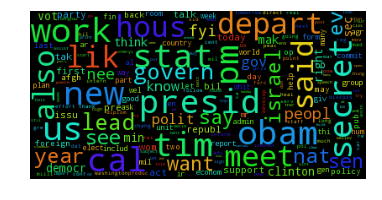

In [19]:
# Display wordcloud with a lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(stemmedBody)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

* Second way: WordNetLemmatizer

In [20]:
from nltk.stem.wordnet import WordNetLemmatizer

In [21]:
lm = WordNetLemmatizer()
stemmed_tokens2 = [lm.lemmatize(word) for word in filtered_tokens]

In [22]:
print(stemmed_tokens2[0:30])
print(len(stemmed_tokens2))

['0', ',', '1', ',"', 'B6', 'Thursday', ',', 'March', '3', ',', '2011', '9', ':', '45', 'PM', 'H', ':', 'Latest', 'How', 'Syria', 'aiding', 'Qaddafi', '...', 'Sid', 'hrc', 'memo', 'syria', 'aiding', 'libya', '030311']
530167


In [23]:
stemmedBody2 = ' '.join(stemmed_tokens2)

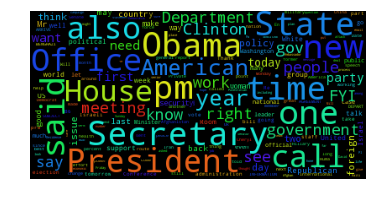

In [24]:
# Display wordcloud with a lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(stemmedBody2)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()